# This noteboook is used to get predictions for heat transfer coefficient (h) and sulfur average temperature (T)
### *Maximum time for accurate predictions is t=7200s*

### Import tools to get and plot results

In [1]:
from stesml.stes_model import stes_model
from stesml.plot_tools import plot_results
from stesml.plot_tools import save_figures

/Users/kmenear/Projects/sulfur_tes_ml/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Get predictions for heat transfer coefficient, up until some end time

       flow-time   Tw   Ti        h_hat
0            0.0  600  500     2.622988
1            0.1  600  500  1179.516846
2            0.2  600  500   798.808594
3            0.3  600  500   634.471924
4            0.4  600  500   543.899475
...          ...  ...  ...          ...
71995     7199.5  600  500    37.552547
71996     7199.6  600  500    37.552547
71997     7199.7  600  500    37.552547
71998     7199.8  600  500    37.552547
71999     7199.9  600  500    37.552547

[72000 rows x 4 columns]


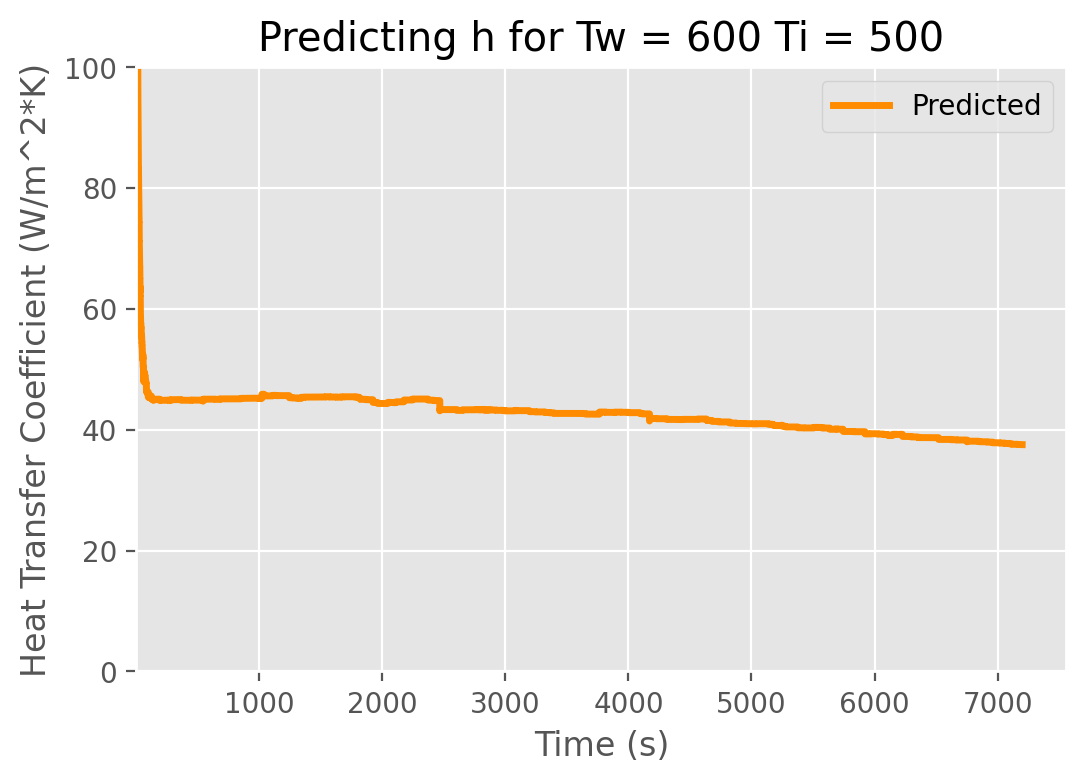

In [2]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
end_time = 7200 # seconds
stepsize = 0.1 # seconds
model_name = 'XGBoost_h_model'
model_type = 'XGBoost'

X = stes_model.predict_h(Ti, Tw, end_time, stepsize, model_name, model_type)

print(X)
figure = plot_results(X)

### Optionally save this figure

In [3]:
figures_directory = save_figures(figure)
print(f'Figure saved to {figures_directory}')

Figure saved to ../figures/20220727-145405/


### Get predictions for heat transfer coefficient at a specific time

In [4]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
time = 2000 # seconds
model_name = 'XGBoost_h_model'
model_type = 'XGBoost'

h = stes_model.predict_h_at_time_t(Ti, Tw, time, model_name, model_type)

print(f'h is {h} at time {time}s.')

h is 44.38107681274414 at time 2000s.


### Get predictions for average temperature during a range of time

In [7]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
start_time = 500 # seconds
end_time = 7000 # seconds
stepsize = 0.1 # seconds
model_name = 'XGBoost_h_model'
model_type = 'XGBoost'

average_h = stes_model.predict_average_h(Ti, Tw, start_time, end_time, stepsize, model_name, model_type)

print(f'Average h is {average_h} between time {start_time}s and {end_time}s.')

            Tw   Ti      h_hat
flow-time                     
500.0      600  500  44.910576
500.1      600  500  44.910576
500.2      600  500  44.910576
500.3      600  500  44.910576
500.4      600  500  44.910576
...        ...  ...        ...
6999.5     600  500  37.859879
6999.6     600  500  37.859879
6999.7     600  500  37.859879
6999.8     600  500  37.859879
6999.9     600  500  37.859879

[65000 rows x 3 columns]
Average h is 42.37009048461914 between time 500s and 7000s.


### Get predictions for sulfur average temperature, up until some end time

In [ ]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
end_time = 7200 # seconds
stepsize = 0.1 # seconds
T_model_name = 'NN_T_model_tLessThan360'
T_model_type = 'NN'
hybrid_model = True

if hybrid_model:
    h_model_name = 'XGBoost_h_model'
    h_model_type = 'XGBoost'
    hybrid_split_time = 360 # seconds
    X = stes_model.predict_T(Ti, Tw, end_time, stepsize, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    X = stes_model.predict_T(Ti, Tw, end_time, stepsize, T_model_name, T_model_type)

print(X)
figure = plot_results(X)

### Optionally save this figure

In [ ]:
figures_directory = save_figures(figure)
print(f'Figure saved to {figures_directory}')

### Get predictions for sulfur average temperature at a specific time

In [ ]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
time = 7000 # seconds
T_model_name = 'NN_T_model_tLessThan360'
T_model_type = 'NN'
hybrid_model = True

if hybrid_model:
    h_model_name = 'XGBoost_h_model'
    h_model_type = 'XGBoost'
    hybrid_split_time = 360 # seconds
    T = stes_model.predict_T_at_time_t(Ti, Tw, time, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    T = stes_model.predict_T_at_time_t(Ti, Tw, time, T_model_name, T_model_type)
    
print(f'T is {T} at time {time}s.')

### Get predictions for average temperature during a range of time

In [ ]:
Ti = 500 # Kelvin
Tw = 600 # Kelvin
start_time = 5000 # seconds
end_time = 7000 # seconds
stepsize = 0.1 # seconds
T_model_name = 'NN_T_model_tLessThan360'
T_model_type = 'NN'
hybrid_model = True

if hybrid_model:
    h_model_name = 'XGBoost_h_model'
    h_model_type = 'XGBoost'
    hybrid_split_time = 360 # seconds
    average_T = stes_model.predict_average_T(Ti, Tw, start_time, end_time, stepsize, T_model_name, T_model_type, hybrid_model, h_model_name, h_model_type, hybrid_split_time)
else:
    average_T = stes_model.predict_average_T(Ti, Tw, start_time, end_time, stepsize, T_model_name, T_model_type)
    
print(f'Average T is {average_T} between time {start_time}s and {end_time}s.')